In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Curve Fitting

## Toy Dataset

We first begin by building a method that produces a toy dataset. The data points are generated by adding random noise to the function $\sin{(2\pi x)}$.

The input values $\{x_n\}$ are generated uniformly in the range $(0,1)$ and the target values $\{t_n\}$ are generated by computing $\sin{(2\pi x)}$ and then adding random Gaussian noise with standard deviation $0.3$.

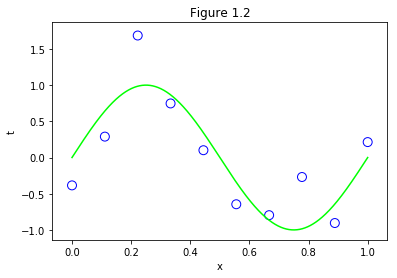

In [2]:
def toy_data(N, std = 0.3):
    x_vec = np.linspace(0,1,N)
    noise_vec = np.random.normal(loc=0, scale = std, size = N)
    t_vec = np.sin(2*np.pi*x_vec)+noise_vec
    return x_vec, t_vec

x_train, t_train = toy_data(10)

plt.figure()
x_sin = np.linspace(0,1,1000)
plt.plot(x_sin, np.sin(2*np.pi*x_sin), c='lime')
plt.scatter(x_train, t_train, edgecolors='blue', facecolors='none', s=80)
plt.title('Figure 1.2')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Our data consists of the blue dots and we would like to recover the underlying function ($\sin{(2\pi x)}$). However, like all real world examples, the data is slightly noisy.

## M-order polynomial

We can try and fit a curve to the toy dataset by using a polynomial function of the form

$$y(x,\mathbf{w}) = w_0 + w_1x + w_2x^2 + ... + w_Mx^M = \sum_{j=0}^Mw_jx^j.$$

Since this function is linear in the coefficients $\mathbf w$ this is known as a linear model.

Let's write a function for this equation:

In [3]:
def M_order_polynomial(x,w):
    M=len(w)-1
    power_vec = np.arange(0,M+1)
    x_vec = np.repeat(x,M+1)
    y = np.sum(w * x_vec**power_vec)
    return y

This function takes a single value for $x$ and a vector containing the coefficients $\mathbf w$. 

As an example we plot $y = 2-3x-3x^2+2x^3$,  where $-1.5\leq x\leq 2.5$

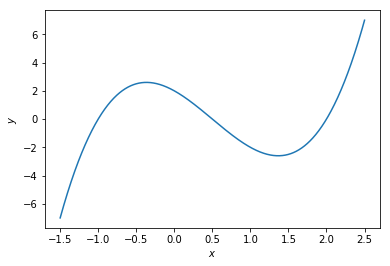

In [4]:
x = np.linspace(-1.5,2.5,1000)
w = np.array([2,-3,-3,2])
y = [M_order_polynomial(x_i,w) for x_i in x]
plt.figure()
plt.plot(x,y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

## Sum of squares error

For the toy dataset in Figure 1.2 we fit a polynomial to the dataset by finding the optimum values of $\mathbf w$. This is done by minimising an error function for a given value of $\mathbf w$.

For example, the sum of squares error function is given by,

$$E(\mathbf w) = \frac{1}{2} \sum^N_{n=1}\{y(x_n,\mathbf w) - t_n\}^2$$

where the factor of 1/2 is included for convenience.

In [5]:
def E_sum_of_squares(y, t):
    return np.sum((y-t)**2)/2

We minimise the error function by deriving with respect to each $w_i$ and setting to zero. This minimisation gives a unique solution $\mathbf w^\star$. This is demonstrated in Exercise 1.1

### Exercise 1.1

We differentiate $E(\mathbf w)$ with respect to each coefficient, $w_i$ and set that equal to $0$.

\begin{align}
E(\mathbf w) &= \frac{1}{2} \sum^N_{n=1}\{y(x_n,\mathbf w) - t_n\}^2\\
\frac{dE(\mathbf w)}{d w_i} &= \sum^N_{n=1}\Big\{y(x_n,\mathbf w)-t_n\Big\}\frac{dy(x_n,\mathbf w)}{dw_i}\\
\frac{dE(\mathbf w)}{d w_i} &= \sum^N_{n=1}\Big\{\sum^M_{j=0}w_j(x_n)^j-t_n\Big\}(x_n)^i\\
0 &=  \sum^N_{n=1}\sum^M_{j=0}w_j(x_n)^{i+j}-\sum^N_{n=1}t_n(x_n)^i\\
\sum^N_{n=1}t_n(x_n)^i &= \sum^N_{n=1}\sum^M_{j=0}w_j(x_n)^{i+j}\\
T_i &= \sum^M_{j=0}A_{ij}w_j
\end{align}

We can then solve this set of linear equations for $\mathbf w$.

Let's build a method that does this.

In [6]:
def polynomial_curve_fit(x, t, M=3):
    A = np.array([[np.sum(x**(i+j)) for i in range(0,M+1)] for j in range(0,M+1)])
    A_inv = np.linalg.inv(A)
    T = np.array([np.sum(t*x**i) for i in range(0,M+1)])
    w = np.matmul(A_inv, T)
    return w

Below are four examples of fitting polynomials of different degrees ($M=0,1,3,9$) to the toy training data presented above.

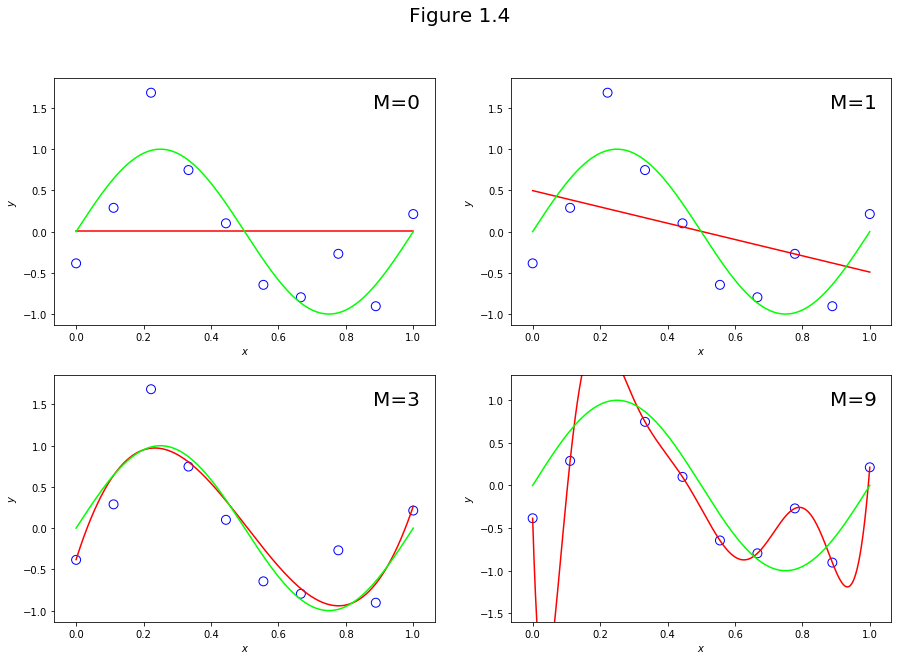

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))

w = polynomial_curve_fit(x_train,t_train, M=0)
y_fit = [M_order_polynomial(x_i,w) for x_i in x_sin]
ax1.plot(x_sin,y_fit, c='red')
ax1.plot(x_sin, np.sin(2*np.pi*x_sin), c='lime')
ax1.scatter(x_train, t_train, edgecolors='blue', facecolors='none', s=80)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.text(0.9, 0.90, 'M=0', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=20)

w = polynomial_curve_fit(x_train,t_train, M=1)
y_fit = [M_order_polynomial(x_i,w) for x_i in x_sin]
ax2.plot(x_sin,y_fit, c='red')
ax2.plot(x_sin, np.sin(2*np.pi*x_sin), c='lime')
ax2.scatter(x_train, t_train, edgecolors='blue', facecolors='none', s=80)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.text(0.9, 0.90, 'M=1', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=20)

w = polynomial_curve_fit(x_train,t_train, M=3)
y_fit = [M_order_polynomial(x_i,w) for x_i in x_sin]
ax3.plot(x_sin,y_fit, c='red')
ax3.plot(x_sin, np.sin(2*np.pi*x_sin), c='lime')
ax3.scatter(x_train, t_train, edgecolors='blue', facecolors='none', s=80)
ax3.set_xlabel(r'$x$')
ax3.set_ylabel(r'$y$')
ax3.text(0.9, 0.90, 'M=3', horizontalalignment='center', verticalalignment='center', transform=ax3.transAxes, fontsize=20)

w = polynomial_curve_fit(x_train,t_train, M=9)
y_fit = [M_order_polynomial(x_i,w) for x_i in x_sin]
ax4.plot(x_sin,y_fit, c='red')
ax4.plot(x_sin, np.sin(2*np.pi*x_sin), c='lime')
ax4.scatter(x_train, t_train, edgecolors='blue', facecolors='none', s=80)
ax4.set_xlabel(r'$x$')
ax4.set_ylabel(r'$y$')
ax4.set_ylim([-1.6,1.3])
ax4.text(0.9, 0.90, 'M=9', horizontalalignment='center', verticalalignment='center', transform=ax4.transAxes, fontsize=20)

fig.suptitle('Figure 1.4', fontsize=20)
plt.show()

When $M=9$ we see that the fitted curve is clearly overfitting. We can investigate the effect $M$ has on $E(\mathbf w^\star)$.

Let's consider a test set consisting of $N=100$ points generated using the same method that was used to generate the training set. We can also investigate the effect $M$ has on the error rate for this test data.

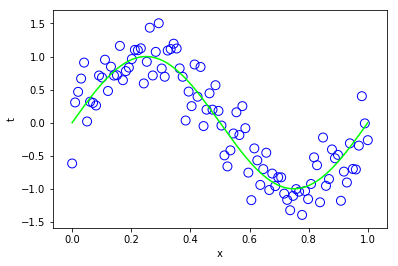

In [8]:
x_test, t_test = toy_data(100)

plt.figure()
x_sin = np.linspace(0,1,1000)
plt.plot(x_sin, np.sin(2*np.pi*x_sin), c='lime')
plt.scatter(x_test, t_test, edgecolors='blue', facecolors='none', s=80)
plt.xlabel('x')
plt.ylabel('t')
plt.show()

## Root Mean Square Error

It is more convenient to use the Root Mean Square Error:

$$E_{RMS} = \sqrt{2E(\mathbf w^\star)/N}$$

In [9]:
def E_rms(y,t):
    return np.sqrt(2*E_sum_of_squares(y,t)/len(y))

Thus we can plot $E_{RMS}$ against $M$ for both the Training set and the Testing set.

In [10]:
E_rms_train = []
E_rms_test = []
for M in range(0,10):
    w = polynomial_curve_fit(x_train,t_train, M=M)
    y_test = [M_order_polynomial(x_i,w) for x_i in x_test]
    y_train = [M_order_polynomial(x_i,w) for x_i in x_train]
    E_rms_train.append(E_rms(y_train, t_train))
    E_rms_test.append(E_rms(y_test, t_test))
E_rms_test = np.array(E_rms_test)
E_rms_train = np.array(E_rms_train)

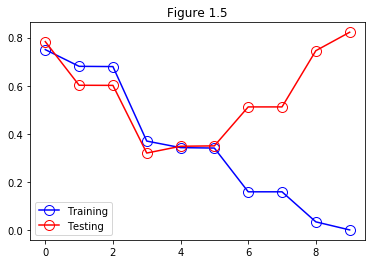

In [11]:
plt.figure()
plt.plot(E_rms_train, 'o-', c='blue', mfc = 'None', ms=10, label='Training')
plt.plot(E_rms_test, 'o-', c='red', mfc='None', ms=10, label='Testing')
plt.legend()
plt.title('Figure 1.5')
plt.show()

We can see that for $M=9$ the Training Error goes down to $0$ while the Testing error starts to shoot up. This is overfitting.

What is happening is that the model is getting tuned to the noise in the data.

We can investigate what happens when we increase the number of training data points for $M=9$.

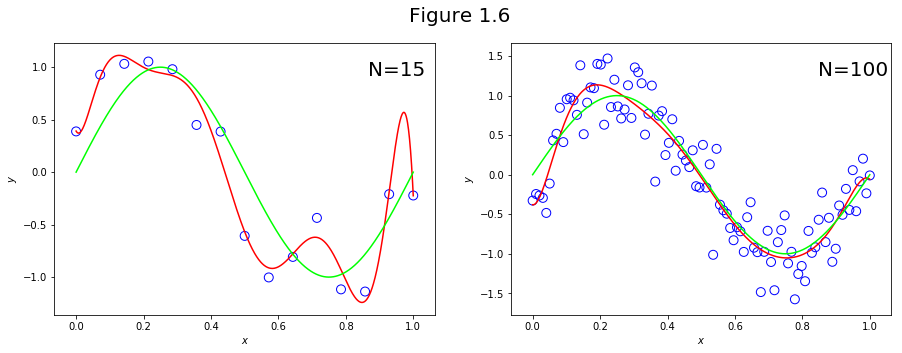

In [12]:
x_train_15, t_train_15 = toy_data(15)
x_train_100, t_train_100 = toy_data(100)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

w = polynomial_curve_fit(x_train_15, t_train_15, M=9)
y_fit = [M_order_polynomial(x_i,w) for x_i in x_sin]
ax1.plot(x_sin,y_fit, c='red')
ax1.plot(x_sin, np.sin(2*np.pi*x_sin), c='lime')
ax1.scatter(x_train_15, t_train_15, edgecolors='blue', facecolors='none', s=80)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.text(0.9, 0.90, 'N=15', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=20)

w = polynomial_curve_fit(x_train_100, t_train_100, M=9)
y_fit = [M_order_polynomial(x_i,w) for x_i in x_sin]
ax2.plot(x_sin,y_fit, c='red')
ax2.plot(x_sin, np.sin(2*np.pi*x_sin), c='lime')
ax2.scatter(x_train_100, t_train_100, edgecolors='blue', facecolors='none', s=80)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.text(0.9, 0.90, 'N=100', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=20)

fig.suptitle('Figure 1.6', fontsize=20)
plt.show()

This shows that one way of dealing with overfitting is to increase the size of data set used to train the model.

## Regularisation

Another way of dealing with overfitting is to introduce a penalty term that discourages the coefficients from reaching large values.

The simplest penalty term is a sum of squares of all the coefficients leading to a modified error function;

$$\tilde{E}(\mathbf w) = \frac{1}{2}\sum^N_{n=1}\big\{y(x_n,\mathbf w)-t_n\big\}^2-\frac{\lambda}{2}\big|\big|\mathbf{w}\big|\big|^2$$

where $\big|\big|\mathbf{w}\big|\big|^2 \equiv \mathbf{w}^T\mathbf{w} = w_0^2+w_1^2+...+w_M^2$

This error function can also be minimised to find an exact solution. This is done in Exercise 1.2

### Exercise 1.2

We differentiate $\tilde E(\mathbf w)$ with respect to each coefficient, $w_i$ and set that equal to $0$.

\begin{align}
\tilde E(\mathbf w) &= \frac{1}{2} \sum^N_{n=1}\{y(x_n,\mathbf w) - t_n\}^2 +\frac{\lambda}{2}\big|\big|\mathbf{w}\big|\big|^2\\
\frac{d\tilde E(\mathbf w)}{d w_i} &= \sum^N_{n=1}\Big\{y(x_n,\mathbf w)-t_n\Big\}\frac{dy(x_n,\mathbf w)}{dw_i} +\lambda w_i\\
\frac{d\tilde E(\mathbf w)}{d w_i} &= \sum^N_{n=1}\Big\{\sum^M_{j=0}w_j(x_n)^j-t_n\Big\}(x_n)^i +\lambda w_i\\
0 &=  \sum^N_{n=1}\sum^M_{j=0}w_j(x_n)^{i+j}-\sum^N_{n=1}t_n(x_n)^i +\lambda w_i\\
\sum^N_{n=1}t_n(x_n)^i &= \sum^N_{n=1}\sum^M_{j=0}w_j(x_n)^{i+j} +\lambda w_i\\
T_i &= \sum^M_{j=0}A_{ij}w_j +\lambda w_i
\end{align}

We only want the equations where $j=i$, otherwise we have two unknowns ($w_i$ and $w_j$) in most of the equations.

\begin{align}
\Rightarrow T_i &= \sum^M_{j=0}(A_{ij}+\delta_{ij}\lambda)w_j\\
T &= (A+\lambda I_n)\mathbf w
\end{align}

We can then solve this set of linear equations for $\mathbf w$.

This type of quadratic regularisation is called ridge regression, or weight decay in neural networks.

Let's build a method for this.

In [13]:
def polynomial_curve_fit_ridge_regression(x, t, l, M=3):
    A = np.array([[np.sum(x**(i+j)) for i in range(0,M+1)] for j in range(0,M+1)])
    I_n = np.identity(M+1)
    A_inv = np.linalg.inv(A+l*I_n)
    T = np.array([np.sum(t*x**i) for i in range(0,M+1)])
    w = np.matmul(A_inv, T)
    return w

We can use this to fit a polynomial of $M=9$ to the training set for differing values of $\lambda$.

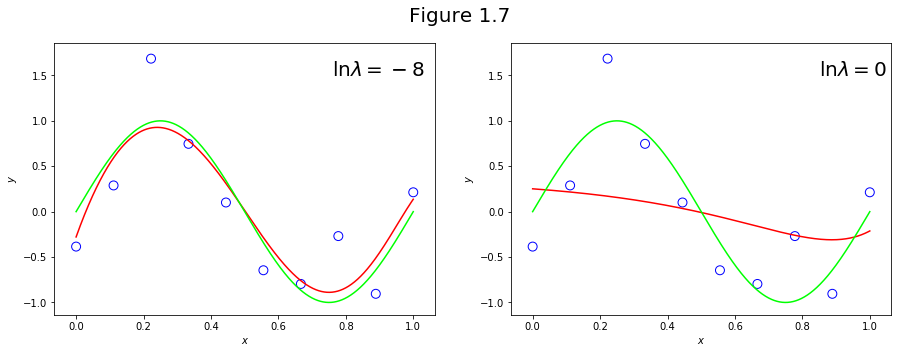

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))

w = polynomial_curve_fit_ridge_regression(x_train, t_train, np.exp(-8), M=9)
y_fit = [M_order_polynomial(x_i,w) for x_i in x_sin]
ax1.plot(x_sin,y_fit, c='red')
ax1.plot(x_sin, np.sin(2*np.pi*x_sin), c='lime')
ax1.scatter(x_train, t_train, edgecolors='blue', facecolors='none', s=80)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$y$')
ax1.text(0.85, 0.90, r'$\ln \lambda = -8$', horizontalalignment='center', verticalalignment='center', transform=ax1.transAxes, fontsize=20)

w = polynomial_curve_fit_ridge_regression(x_train, t_train, np.exp(0), M=9)
y_fit = [M_order_polynomial(x_i,w) for x_i in x_sin]
ax2.plot(x_sin,y_fit, c='red')
ax2.plot(x_sin, np.sin(2*np.pi*x_sin), c='lime')
ax2.scatter(x_train, t_train, edgecolors='blue', facecolors='none', s=80)
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$y$')
ax2.text(0.9, 0.90, r'$\ln \lambda = 0$', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes, fontsize=20)

fig.suptitle('Figure 1.7', fontsize=20)
plt.show()

We see that for $\ln \lambda =-8$ the fit seems to recover the underlying function quite well, while large values of $\lambda$ such as $\ln \lambda =0$ suppresses the fit too much.

We can investigate the effect of the regularisation term by plotting the RMS error with $\ln\lambda$ for both the training and the testing sets.

In [15]:
E_rms_train = []
E_rms_test = []
for ln_l in range(-37,0):
    w = polynomial_curve_fit_ridge_regression(x_train,t_train, np.exp(ln_l), M=9)
    y_test = [M_order_polynomial(x_i,w) for x_i in x_test]
    y_train = [M_order_polynomial(x_i,w) for x_i in x_train]
    E_rms_train.append(E_rms(y_train, t_train))
    E_rms_test.append(E_rms(y_test, t_test))
E_rms_test = np.array(E_rms_test)
E_rms_train = np.array(E_rms_train)

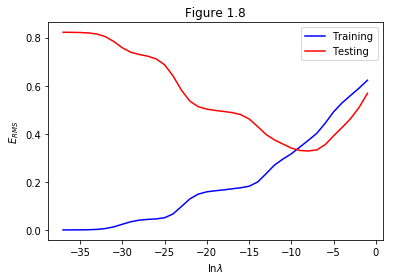

In [16]:
plt.figure()
plt.plot(range(-37,0), E_rms_train, c='blue', mfc = 'None', ms=10, label='Training')
plt.plot(range(-37,0), E_rms_test, c='red', mfc='None', ms=10, label='Testing')
plt.legend()
plt.title('Figure 1.8')
plt.xlabel(r'$\ln \lambda$')
plt.ylabel(r'$E_{RMS}$')
plt.show()

We can now see that $\lambda$ is what controls the effective complexity and determines when the model overfits.

# Probability Theory

Consider two random variables $X$ and $Y$. The probability that both $X=x_i$ and $Y=y_j$ is called the joint probability:

$$ p(X=x_i,Y=y_j) = \frac{n_{ij}}{N}$$

where $n_{ij}$ is the number of trials where both $X=x_i$ and $Y=y_j$, and $N$ is the total number of trials where we sample both $X$ and $Y$. Here we assume $N\to\infty$.

The probability $X$ takes the value $x_i$ is 

$$p(X=x_i) = \frac{c_i}{N}$$

where $c_i$ is the number of trials where $X$ takes the value $x_i$. 

We can deduce $c_i$ by summing $n_{ij}$ over all instances of $j$. I.e.

$$c_i = \sum_jn_{ij}$$.

This gives,

\begin{align}
p(X=x_i) &=\frac{c_i}{N}\\
&= \sum_j\frac{n_{ij}}{N}\\
&= \sum_{j=1}^LP(X=x_i,Y=y_j)
\end{align}

This is called the **sum rule**.

Suppose we want to find the instances of $Y=y_j$ given that $X=x_i$. This is defined as,

$$p(Y=y_j| X=x_i) = \frac{n_{ij}}{c_i}$$

This is called the **conditional** probability.

We can now derive the following

\begin{align}
p(X=x_i,Y=y_j) &= \frac{n_{ij}}{N}\\
&=\frac{n_{ij}}{c_i}\cdot\frac{c_i}{N}\\
&=p(Y=y_j| X=x_i)p(X=x_i)
\end{align}

This is called the **product rule**.

The code below generates points according to a distribution over two variables, X, which takes 9 values, and, Y, which takes 2 values. These values are represented by the red grid. The histograms show the marginal distributions $p(X)$,$p(Y)$ as well as the conditional distribution $p(X|Y=1)$.

In [17]:
#This lets use generate a normal distribution of points with boundaries
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

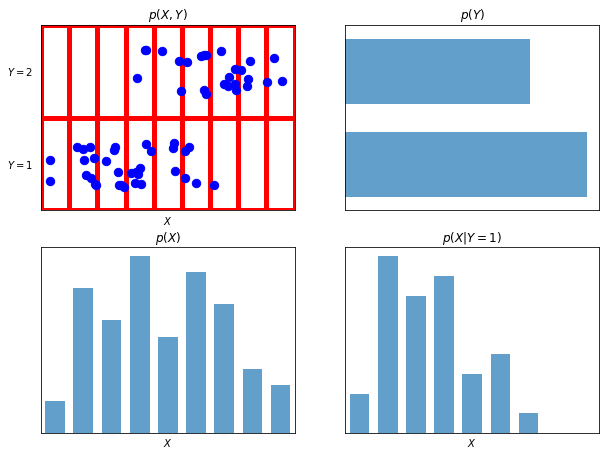

In [18]:
#First we generate our set of points according to each distribution.
#p(x|y=1)
x1 = get_truncated_normal(mean=2.5, sd=2, low=0.1, upp=6.9).rvs(34)
#p(y=1)
y1=np.random.uniform(0.25,0.75,size=34)
#p(x|y=2)
x2 = get_truncated_normal(mean=6.5, sd=2, low=3.1, upp=8.9).rvs(26)
#p(y=2)
y2=np.random.uniform(1.25,1.75,size=26)

#We join the arrays together
x_join = np.concatenate((x1,x2))
y_join = np.concatenate((y1,y2))

#Then we plot them
fig = plt.figure(figsize = (10,7.5))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2,sharey=ax1)
ax3 = fig.add_subplot(2,2,3,sharex=ax1)
ax4 = fig.add_subplot(2,2,4,sharex=ax1)

axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

for i in range(0,2+1):
    ax1.axhline(i,linewidth=5,c='r',zorder=-1)

for i in range(0,9+1):
    ax1.axvline(i,linewidth=5,c='r',zorder=-1)
    
ax1.scatter(x_join,y_join,zorder=1,c='b',s=70)
ax1.set_xlim(0,9)
ax1.set_ylim(0,2)
ax1.set_title(r'$p(X,Y)$')
ax1.text(-1.2,0.45,r'$Y=1$')
ax1.text(-1.2,1.45,r'$Y=2$')
ax1.set_xlabel(r'$X$')

ax2.set_title(r'$p(Y)$')
ax2.hist(y_join,bins=range(0,2+1), rwidth=0.7,alpha=0.7,orientation='horizontal')

ax3.set_title(r'$p(X)$')
ax3.hist(x_join, bins=range(0,9+1), rwidth=0.7,alpha=0.7)
ax3.set_xlabel(r'$X$')

ax4.set_title(r'$p(X|Y=1)$')
ax4.hist(x1, bins=range(0,9+1), rwidth=0.7,alpha=0.7)
ax4.set_xlabel(r'$X$')

plt.show()

#### Bayes theorem

Since $p(X,Y) = p(Y,X)$ then

\begin{align}
p(Y|X)p(X) &= p(X|Y)p(Y)\\
p(Y|X)&= \frac{p(X|Y)p(Y)}{p(X)}\\
&=\frac{p(X|Y)p(Y)}{\sum_Yp(X|Y)p(Y)}
\end{align}

This is called **Bayes' theorem**.

#### Example

Imagine a red box with 2 apples and 6 oranges in it and a blue box with 1 apple and 3 oranges in it.

The probability of selecting the red box is $p(B=r) = 4/10$.

The probability of selecting the blue box is $p(B=b) = 6/10$.

Thus $p(B=b)+p(B=r) = 1$

The probability of picking an apple from the blue box is $p(F=a|B=b) = 3/4$.
Similarly,

\begin{align}
p(F=a|B=r)&=1/4\\
p(F=o|B=r)&=3/4\\
p(F=o|B=b)&=1/4
\end{align}

Again, these are normalised such that,

\begin{align}
p(F=a|B=r)+p(F=o|B=r)&=1\\
p(F=a|B=b)+p(F=o|B=b)&=1
\end{align}

The probability of choosing an apple can thus be calculated as follows:

\begin{align}
p(F=a) &= p(F=a|B=r)p(B=r)+p(F=a|B=b)p(B=b)\\
&=\frac{1}{4}\cdot\frac{4}{10}+\frac{3}{4}\cdot\frac{6}{10}\\
&=\frac{11}{20}
\end{align}

Thus the probability of choosing an orange is $p(F=o) = 1-11/20 = 9/20$.

Suppose we choose an orange and we would like to know the probability of it coming from a red box,

\begin{align}
p(B=r|F=o)&=\frac{p(F=o|B=r)p(B=r)}{p(F=o)}\\
&=\frac{3}{4}\times\frac{4}{10}\times\frac{20}{9}\\
&=\frac{2}{3}
\end{align}

### Exercise 1.3

Probability of picking red, blue, and green boxes are

$$p(r)=0.2,p(b)=0.2,p(g)=0.6$$

The probability of picking an apple from a red box is $p(a|r)=3/10$.
Similarly,

$$
p(o|r) = 4/10,p(l|r)=3/10\\
p(a|b) = 1/2,p(o|b)=1/2,p(l|b)=0\\
p(a|g) = 3/10,p(o|g)=3/10,p(l|g)=4/10\\
$$

The probability of selecting an apple is given by combining the sum and product rules:

\begin{align}
p(a) &= \sum_{i=r,g,b}p(a|i)p(i)\\
&=p(a|r)p(r)+p(a|g)p(g)+p(a|b)p(b)\\
&=0.3\times0.2+0.3\times0.6+0.5\times0.2\\
p(a)&=0.34
\end{align}

The probability that an orange fruit came from green box is given by using Bayes' rule:

\begin{align}
p(g|o) &= \frac{p(o|g)p(g)}{p(o)}\\
&=\frac{p(o|g)p(g)}{\sum p(o|i)p(i)}\\
&=\frac{p(o|g)p(g)}{p(o|r)p(r)+p(o|g)p(g)+p(o|b)p(b)}\\
&=\frac{0.3\times0.6}{0.36}\\
p(g|o)&=0.5
\end{align}

## Probability Densities

Given a probability density $p(x)$ over $x$. The probability that $x$ lies in the interval between $a$ and $b$ is given by

$$ p(x\in(a,b)) = \int^b_ap(x)dx$$

and must satisfy the following conditions;

$$
p(x)\geq0\\
\int^\infty_{-\infty}p(x)dx = 1
$$

#### Nonlinear change of variable

Let us consider a change of variable $x=g(y)$ then $f(x) \rightarrow \tilde{f}(y)=f(g(y))$

For observations $(x,x+\delta x) \rightarrow (y,y+\delta y)$,

$$p_x(x)\delta x \simeq p_y(y)\delta y$$

Thus,

\begin{align}
p_y(y) &= p_x(x)\bigg|\frac{dx}{dy}\bigg|\\
&=p_x(g(y))|g'(y)|
\end{align}

This means that the maximum of the probability density is dependent on the choice of variable:

#### Exercise 1.4

We differentiate equation (1.27):

$$
p^\prime_y(y) = p^\prime_x(g(y))\{g^\prime(y)\}^2 + p_x(g(y))g^{\prime\prime}(y)
$$

We know that at the maximum $x=\hat{x}$, $p^\prime_x(\hat{x}) = 0$. When $x=g(y)$ is linear then $g^{\prime\prime}(\hat y) = 0$ thus $p^\prime_x(g(\hat y))=0$. When $x=g(y)$ is not linear then the second term on the equation above does not go to zero and thus $\hat x = g(\hat y) $ does not hold.

Let's illustrate with an example where $g(y) = ln(y)-ln(1-y)+5$, and $p_x(x)$ is a Gaussian with mean $\mu=6$ and standard deviation $\sigma = 1$, from which we sample $N=100,000$ points. We then transform both the probability density function and those samples, where we see that the mode for the sample shifts.

In [19]:
def gaussian(x,mu=0,sigma=1):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-((x-mu)**2)/(2*sigma**2))

C:\Users\C1764397\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


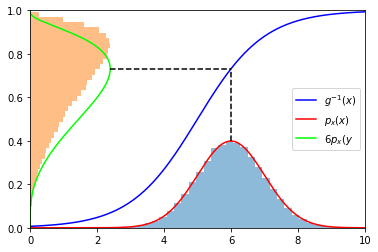

2.39365357618275


In [20]:
def g_y(y):
    return np.log(y) - np.log(1-y) + 5

def g_1_x(x):
    return 1/(1+np.exp(-x+5))

mu=6
sigma=1

x_range = np.linspace(0.001,10,1000)
y_range = np.linspace(0.001,1,1000)
p_xOfx=gaussian(x_range,mu,sigma)
p_xOfy=gaussian(g_y(y_range), mu, sigma)*6
gOfx = g_1_x(x_range)

N=100000
p_x_sample = np.random.normal(mu,sigma,N)
p_y_sample = g_1_x(p_x_sample)

plt.figure()
N_bins = 40
n,bins,patches = plt.hist(p_x_sample,bins=N_bins,density='True', alpha=0.5)
bins_centred = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
plt.plot(x_range,gOfx,'b',label=r'$g^{-1}(x)$')
plt.plot(x_range,p_xOfx,'r',label=r'$p_x(x)$')
plt.plot(p_xOfy,y_range, 'lime', label=r'$6p_x(y$')
loc_xOfy_peak = y_range[np.argmax(p_xOfy)]
loc_xOfx_peak = x_range[np.argmax(p_xOfx)]
plt.axhline(loc_xOfy_peak, xmin = np.max(p_xOfy)/10, xmax = loc_xOfx_peak/10, linestyle = 'dashed', c='k')
plt.axvline(loc_xOfx_peak, ymin = np.max(p_xOfx), ymax = loc_xOfy_peak, linestyle = 'dashed', c='k')
n,bins,patches = plt.hist(p_y_sample,bins=N_bins,density='True', alpha=0.5,orientation='horizontal')
plt.xlim(0,10)
plt.ylim(0,1)
plt.legend()
plt.show()

print(np.max(p_xOfy))

### Cumulative Probability

The cumulative probability density is the probability that $x$ lies in the interval ($-\infty,z$) and is defined as,

$$
P(z) = \int^z_{-\infty}p(x)\text d x
$$

This satisfies $P^\prime(x) = p(x) as shown in Figure 1.12

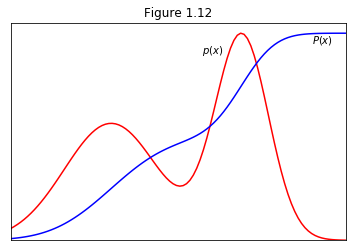

In [55]:
from scipy.stats import norm

x = np.linspace(0,1,100)

cdf1 = norm.cdf(x,0.3,0.14)
cdf2 = norm.cdf(x,0.69,0.08)

cdf = cdf1+cdf2
cdf = cdf/np.max(cdf)

pdf1 = norm.pdf(x,0.3,0.14)
pdf2 = norm.pdf(x,0.69,0.08)

pdf = pdf1+pdf2
pdf = pdf/np.max(pdf)

plt.figure()
plt.plot(x,pdf,c='red')
plt.plot(x,cdf,c='blue')
plt.xticks([])
plt.yticks([])
plt.title('Figure 1.12')
plt.text(0.57,0.9,r'$p(x)$')
plt.text(0.9,0.95,r'$P(x)$')

plt.xlim(0,1)
plt.ylim(0)
plt.show()

**Multivariate PDF**

For a set of continuous variables $x_1,...,x_D$ The joint probability density is $p(\mathbf x ) = p(x_1,...,x_D)$, with

\begin{align}
p(\mathbf x) &\geq 0 \\
\int p(\mathbf x) \text d \mathbf x &= 1
\end{align}

This is also true for probability densities over a combination of discrete and continuous variables.

Bayes Rule applies to continuous variables as well as the **sum and product rules**: 

\begin{align}
p(x) &= \int p(x,y)\text d y \\
p(x,y) &= p(y|x)p(x)
\end{align}

### Expectations and Covariances

The expectation of some function $f(x)$ is the average value of $f(x)$ under a probability distribution $p(x)$. This is denoted by $\mathbb E[f]$.

**Discrete:**
$$\mathbb E[f] = \sum_x p(x)f(x)$$
**Continuous:**
$$\mathbb E[f] = \int p(x)f(x)\text d x$$

For $N$ points drawn from either distribution then $\mathbb E[f]$ can be approximated as:

$$\mathbb E[f] \simeq \frac{1}{N}\sum^N_{n=1}f(x_n)$$

**Multiple variables**

$$\mathbb E_x[f(x,y)]$$

denotes the average of $f(x,y)$ w.r.t $x$. This will then be a function of $y$.

**Conditional expectation:**
$$\mathbb E[f|y] = \sum_x p(x|y)f(x)$$

The **variance** of $f(x)$ is,
\begin{align}
\text{var} [f] &= \mathbb E[(f(x)-\mathbb E[f(x)])^2]\\
\end{align}
***
#### Exercise 1.5
Derive $\text{var}[f] = \mathbb E[f(x)^2]-\mathbb E[f(x)]^2$:

\begin{align}
\text{var}[f] &= \mathbb E[(f(x)-\mathbb E[f(x)])^2]\\
&= \mathbb E[f(x)^2-2f(x)\mathbb E[f(x)]+\mathbb E[f(x)]^2]\\
&= \mathbb E[f(x)^2]-2 \mathbb E[f(x)]\mathbb E[f(x)]+\mathbb E[f(x)]^2\\
&= \mathbb E[f(x)^2]-\mathbb E[f(x)]^2
\end{align}
***
Similarly, the variance of a variable is,
$$\text{var}[x]=\mathbb E[x^2]-\mathbb E[x]^2$$

For two random variables, the **covariance** is,
\begin{align}
\text{cov} [x,y] &= \mathbb E_{x,y}[\{x-\mathbb E[x]\}\{y-\mathbb E[y]\}]\\
&=\mathbb E_{x,y}[xy]-\mathbb E[x] \mathbb E[y]
\end{align}
If $x$ and $y$ are independent then the covariance is zero.

***
#### Exercise 1.6
When $x$ and $y$ are independent then $p(x,y)=p(x)p(y)$. Therefore,

\begin{align}
\mathbb E_{x,y}[xy] &= \int\int xyp(x,y)\text d x\text d y\\
&= \int\int xyp(x)p(y)\text d x\text d y \\
&= \int xp(x)\text d x\int yp(y)\text d y\\
&= \mathbb E[x]\mathbb E[y]
\end{align}
Thus $\text{cov}[x,y] = 0$
***
For two vectors, $\mathbf x$ and $\mathbf y$,
\begin{align}
\text{cov}[\mathbf x,\mathbf y] &= \mathbb E_{\mathbf x,\mathbf y}[\{\mathbf x = \mathbb E[\mathbf x]\}\{\mathbf y^T-\mathbb E[\mathbf y^T]\}]\\
&=\mathbb E_{\mathbf x,\mathbf y}[\mathbf x \mathbf y^T]-\mathbb E[\mathbf x]\mathbb E[\mathbf y^T]
\end{align}

### 